# Общая информация

Корреляции между датчиками смартфона, алгоритмами и соответствующими методами являются основными компонентами, облегчающими локализацию и отслеживание в помещении при отсутствии стандартов связи и локализации. Можно отметить серьезный пробел в исследованиях с точки зрения объяснения связей между этими компонентами для выяснения последствий и проблем моделей, предназначенных для локализации и отслеживания в помещении.  

Данные были отобраны с частотой 10 Гц в течение пяти секунд в фиксированных местах.  
Кроме того, данные также собирались во время движения.  

Из-за того, что наш мир не настолько идеален и реальный объект это не просто двигающийся кубик в неком пустом пространстве, создаются множество проблем для получения инерциального навигационого решения.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

url = ""

Загрузим данные

In [ ]:
from google.colab import drive

url = '/content/drive/My Drive/Colab Notebooks/'
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
dataset = pd.read_csv(url + 'data/accelerometer_gyro_mobile_phone_dataset.csv')

# Информация о наборе данных

Выведим некоторую информацию по набору данных

In [ ]:
dataset.head()

,accX,accY,accZ,gyroX,gyroY,gyroZ,timestamp,Activity
0,-0.496517,3.785628,8.954828,-0.142849,-0.126159,-0.022539,34:22.9,1
1,-0.462388,3.869603,9.281898,0.084349,0.096695,0.092130,34:23.0,1
2,-0.296084,3.820505,8.930728,0.061763,0.051543,0.071287,34:23.1,1
3,-0.469723,3.890110,8.744067,0.007641,0.028679,0.109433,34:23.2,1
4,-0.472418,4.109105,8.941207,-0.123640,0.099057,0.051943,34:23.3,1


In [ ]:
dataset.describe()

,accX,accY,accZ,gyroX,gyroY,gyroZ,Activity
count,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000
mean,0.023825,2.153858,9.537909,-0.004493,-0.014756,-0.007021,0.982151
std,0.741396,1.085466,2.056358,0.307643,0.249201,0.266120,0.132404
min,-3.673361,-4.386029,4.296066,-1.470421,-1.430659,-1.894102,0.000000
25%,-0.472193,1.413062,7.794217,-0.149783,-0.162656,-0.154126,1.000000
50%,-0.024998,2.119143,9.406739,0.022301,-0.011060,0.005261,1.000000
75%,0.477208,2.928435,11.158845,0.177978,0.124966,0.152061,1.000000
max,4.678671,6.377039,17.591568,1.332722,1.480135,1.482268,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31991 entries, 0 to 31990
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   accX       31991 non-null  float64
 1   accY       31991 non-null  float64
 2   accZ       31991 non-null  float64
 3   gyroX      31991 non-null  float64
 4   gyroY      31991 non-null  float64
 5   gyroZ      31991 non-null  float64
 6   timestamp  31991 non-null  object 
 7   Activity   31991 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 2.0+ MB


Пропуски отсутствуют

In [ ]:
dataset.describe(include=['O'])

,timestamp
count,31991
unique,21776
top,54:46.9
freq,4


Пропуски отсутствуют

## Преобразуем timestamp

In [ ]:
for i, t in zip(range(dataset.shape[0]), dataset.timestamp.values):
  d = t.split(sep=' ')
  if len(d) != 1:
    print(i, d)

20928 ['6/25/2022', '14:05']


In [ ]:
def time(timestamp):
  time = []
  hour = 0
  for x in timestamp:
    t = x.split(sep=' ')
    if len(t) != 1:
      t = t[-1]
    else:
      t = t[0]
    min, sec = t.split(sep=':')
    min = float(min)
    if min == 0:
      hour += 1
    time.append(hour*60.0*60.0 + min*60.0 + float(sec))
  return time

sec = time(dataset.timestamp.values)

In [ ]:
dataset.timestamp = sec
# И сместим точку отчета в ноль
dataset.timestamp -= dataset.timestamp[0]

In [ ]:
dataset.describe()

,accX,accY,accZ,gyroX,gyroY,gyroZ,timestamp,Activity
count,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000,31991.000000,3.199100e+04,31991.000000
mean,0.023825,2.153858,9.537909,-0.004493,-0.014756,-0.007021,9.873494e+05,0.982151
std,0.741396,1.085466,2.056358,0.307643,0.249201,0.266120,6.137616e+05,0.132404
min,-3.673361,-4.386029,4.296066,-1.470421,-1.430659,-1.894102,0.000000e+00,0.000000
25%,-0.472193,1.413062,7.794217,-0.149783,-0.162656,-0.154126,6.540909e+05,1.000000
50%,-0.024998,2.119143,9.406739,0.022301,-0.011060,0.005261,6.557339e+05,1.000000
75%,0.477208,2.928435,11.158845,0.177978,0.124966,0.152061,1.279527e+06,1.000000
max,4.678671,6.377039,17.591568,1.332722,1.480135,1.482268,2.021333e+06,1.000000


accX - проекция удельной силы тела на ось X СК датчика  
gyroX - проекция угловой скорости на ось X СК датчика

## Визуализация данных

### Покажем распределение измерений

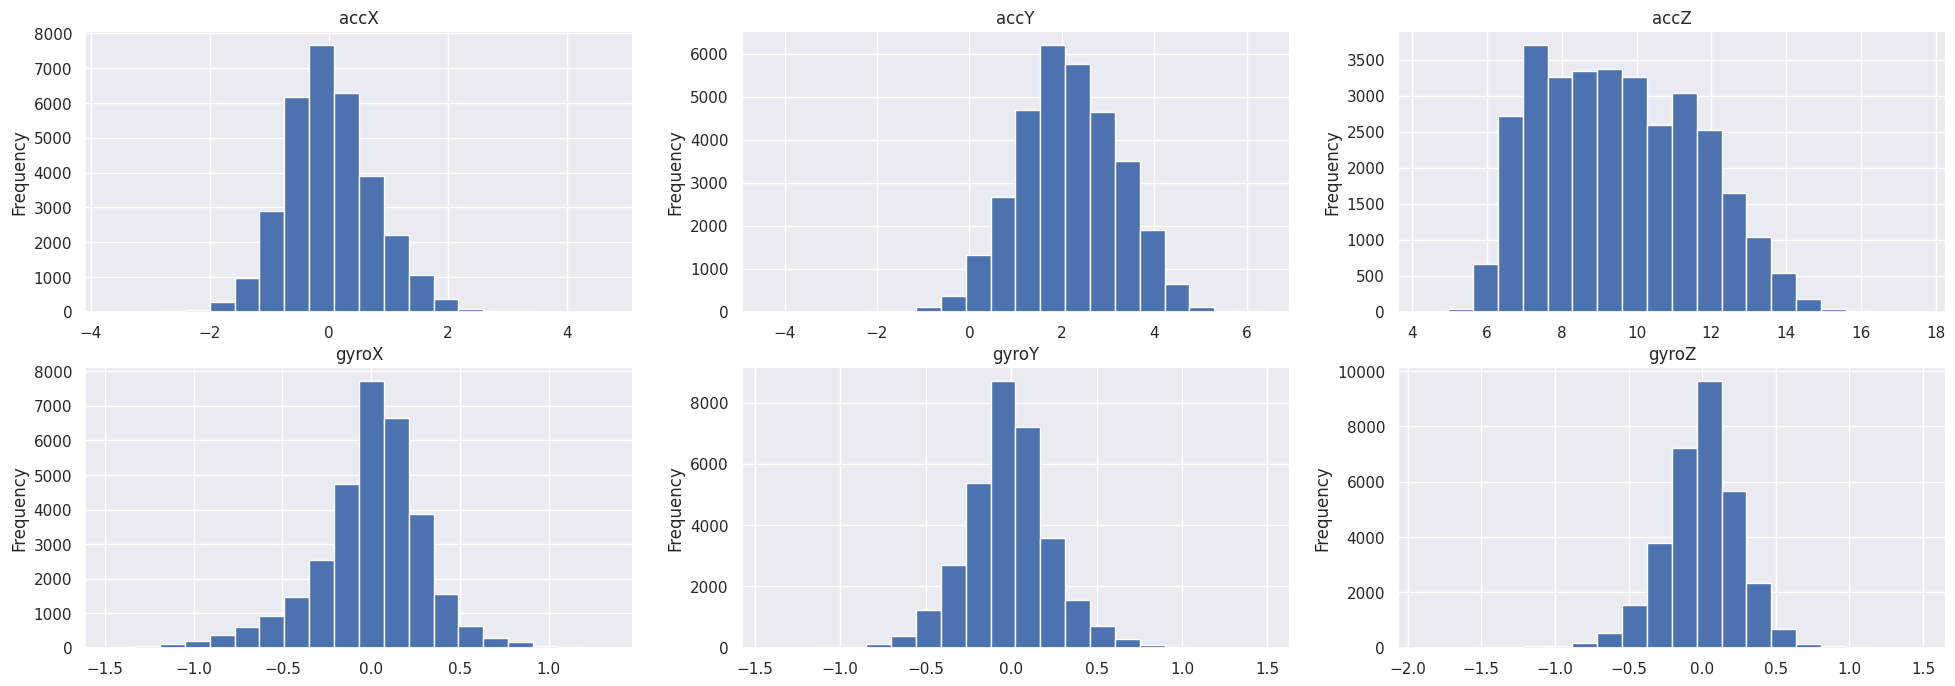

In [ ]:
plt.figure(figsize=(8*3,4*2))


for i, col in zip(range(n_features), dataset.columns[:-2]):
    plt.subplot(2, 3, i+1)

    dataset[col].plot(kind='hist', bins=20, title=col)
    plt.gca().spines[['top', 'right',]].set_visible(False)

**Видем, что данные с гироскопа и акселерометра подчиняются гауссовскому распределению. Это дает понять, что в основном в приборах присутствует гауссовский шум.**

In [ ]:
vc = dataset['Activity'].value_counts()

d = 100 * vc[0] / (vc[0]+vc[1])
print(f'Измерения при неподвижности составляют {round(d, 3)} % данных')
print(f'Измерения при движении составляют {round(100 - d, 3)} % данных')

Измерения при неподвижности составляют 1.785 % данных
Измерения при движении составляют 98.215 % данных


Видем сильный дисбаланс классов

### Рассмотрим временные ряды

In [ ]:
n_features = 6

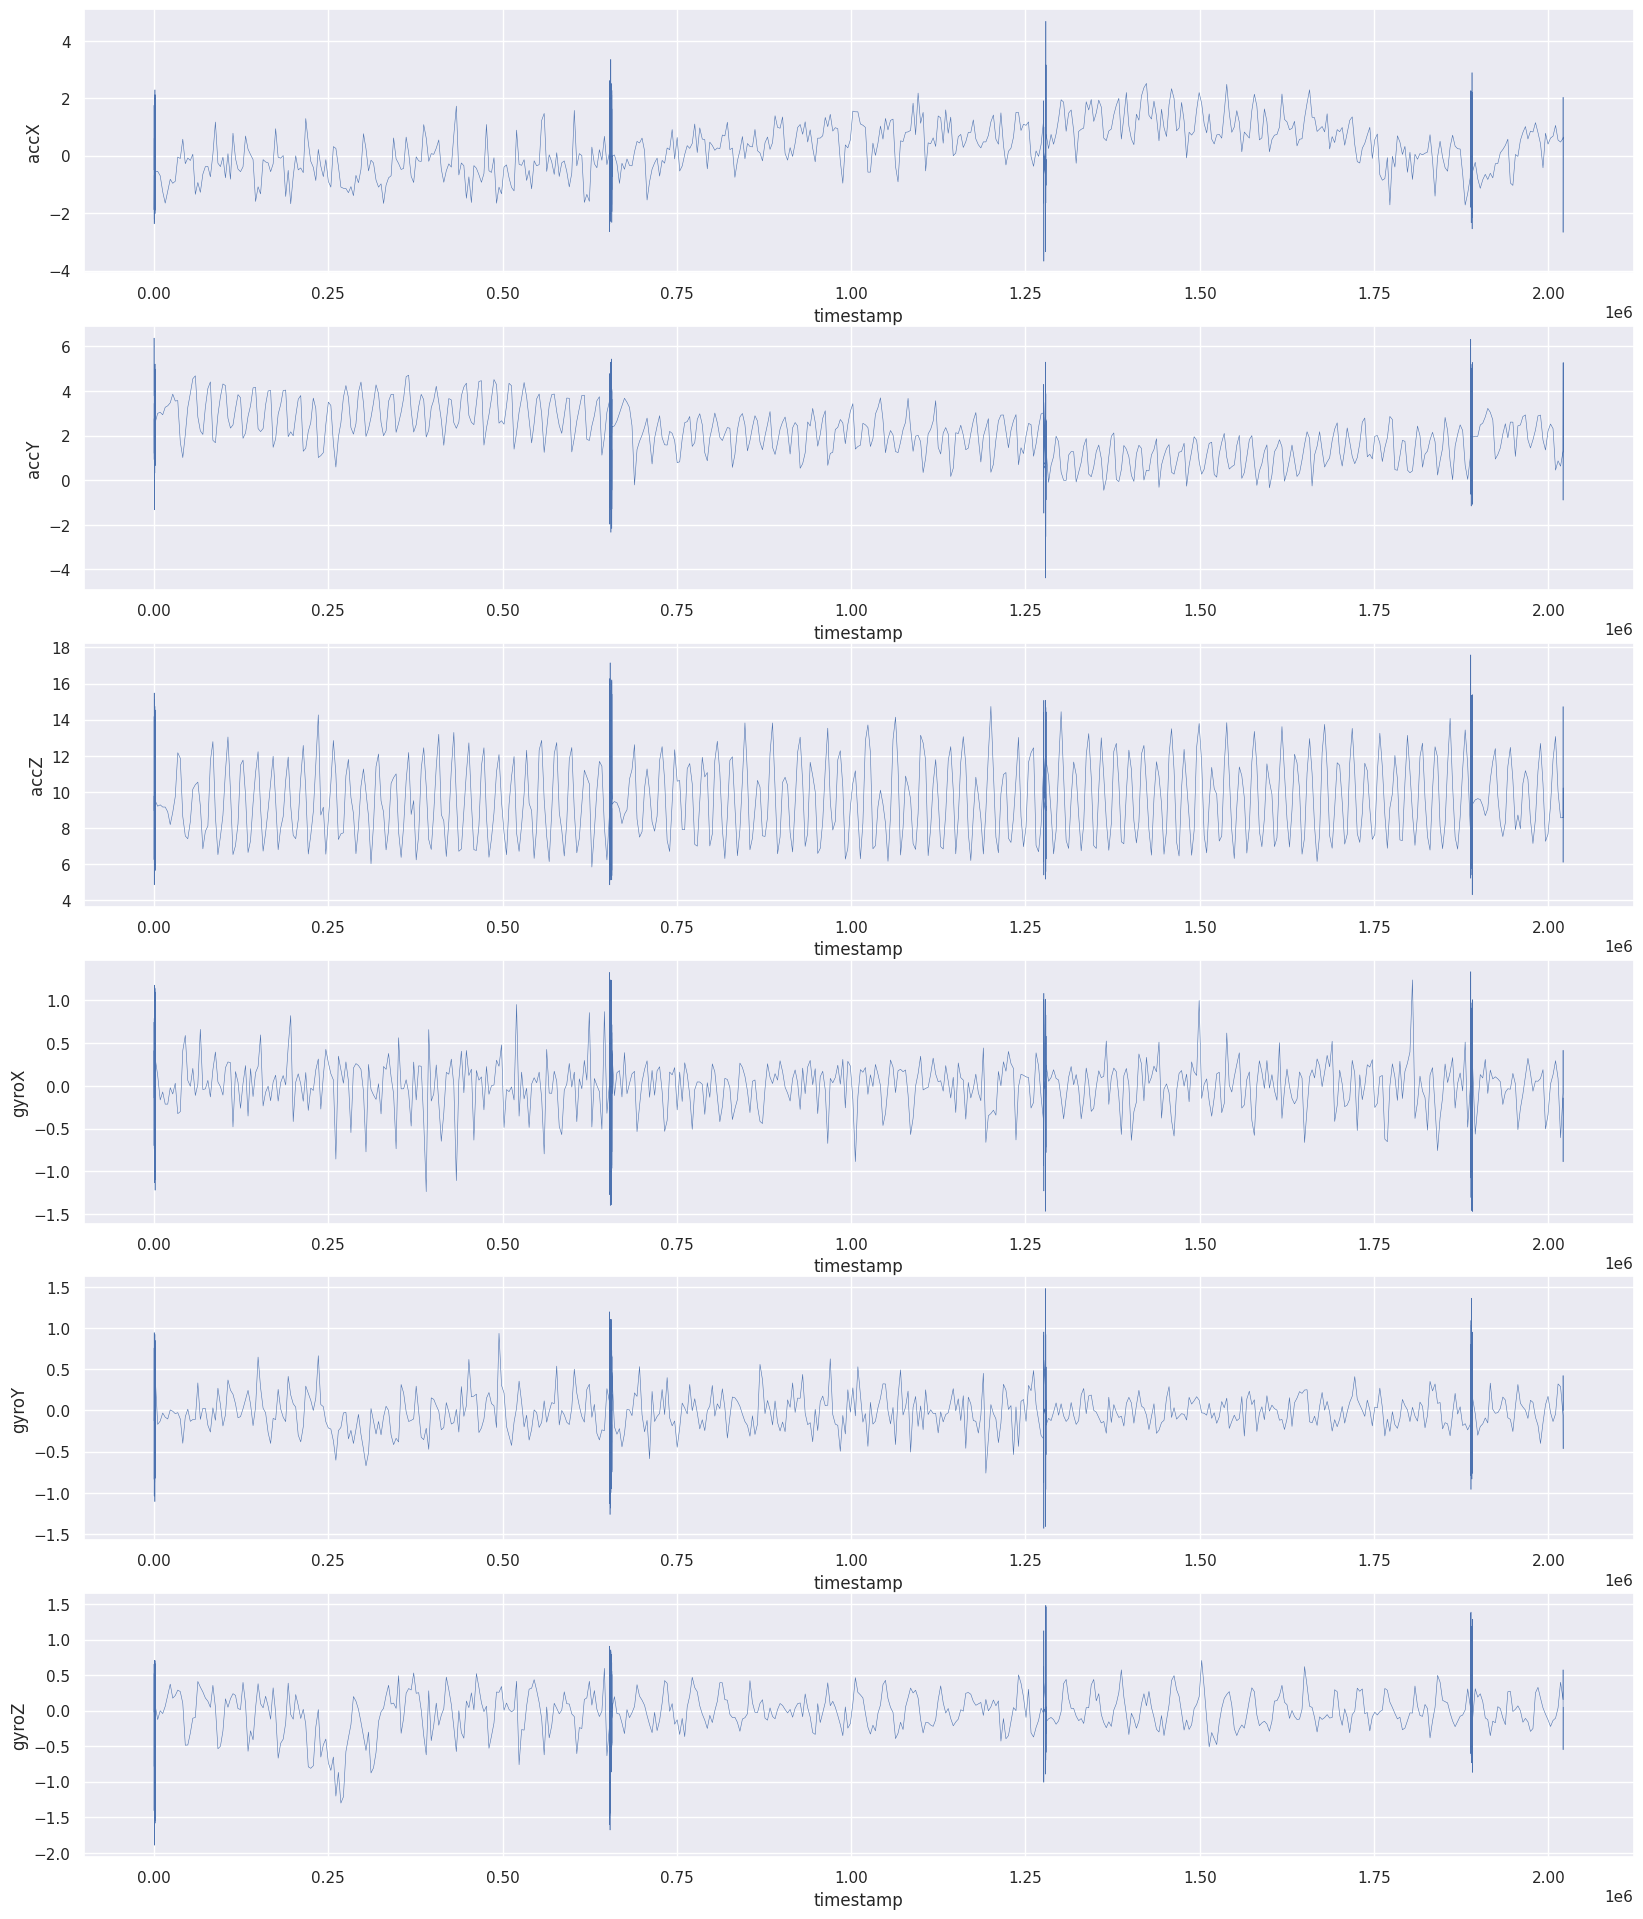

In [ ]:
plt.figure(figsize=(20,4*n_features))


for i, col in zip(range(n_features), dataset.columns[:-2]):
  plt.subplot(n_features, 1, i+1)
  plt.plot(dataset.timestamp, dataset[col], lw=0.4)

  plt.xlabel('timestamp')
  plt.ylabel(col)
plt.show()

Text(0, 0.5, 'Activity')

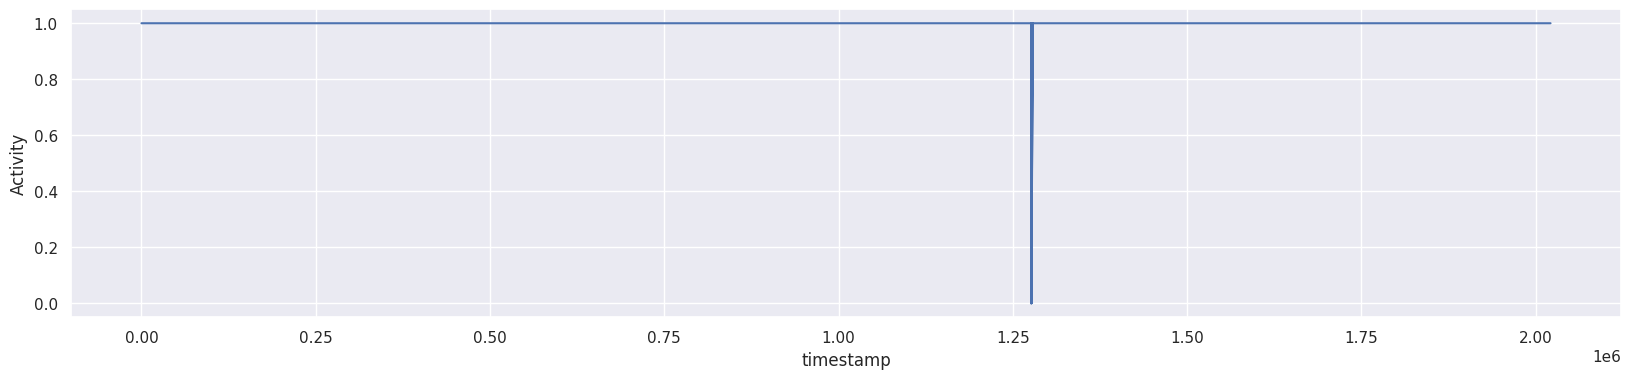

In [ ]:
plt.figure(figsize=(20,4))

plt.plot(dataset.timestamp, dataset.Activity)
plt.xlabel('timestamp')
plt.ylabel('Activity')

### Вывод

**По графикам видно, что измерения можно представить, как сумму тригонометрических функций, где частоты будут меняться со временем.**

**Можно попытаться перейти в частотное пространство, используя Фурье-преобразование или Вейвлет-преобразование.**

**В реальности для таких задач мог бы подойти cкользящее Фурье-преобразование (SDFT), как, к примеру, при получении электрокардиограммы.**

Для решение задачи как раз можно получить ряды частот с амплитудами и для каждой из оси приборов использовать свой оптимальный набор частот с пороговыми значениями магнитуд, говоря простым языком.  
Есть только в этом одна важная проблема, пороги находятся для фиксированной системы координат, так как есть сила тяжести.

Из-за этого, IMU должны приводиться к конкретной СК, обычно это Международная земная система координат, либо просчитываться во время работы, но для этого надо получать точные данные с других источников.

Выбор частот, по которым в дальнейшем будет обучаться одна из модель, зависит от профиля движения объекта, в основном это низкочастотный спектр примерно до 10 Гц. Так как выше, либо шумы, либо редкие мгновенные действия.  
Человек может быстро повернуться, но на небольшой угол, и делать это часто.  
Оставаясь зачастую неподвижно.   
А вот ускорение наоборот может оказаться большим, но не продолжительным.  
Ещё сильно зависит от расположения телефона, в руках он, в сумке или в кармане.  

Это приводит на мысль, что определение стоянки будет обладать хорошой точностью, но с низкой полнотой или низкой точностью и большой полнотой.  
Я считаю, что здесь важно как можно меньше ложных ответов, так как они могут приводить к увеличению ошибки определения локализации.

# Преобразования данных

## Фурье и Вейвлет преобразования

Получим Фурье графики

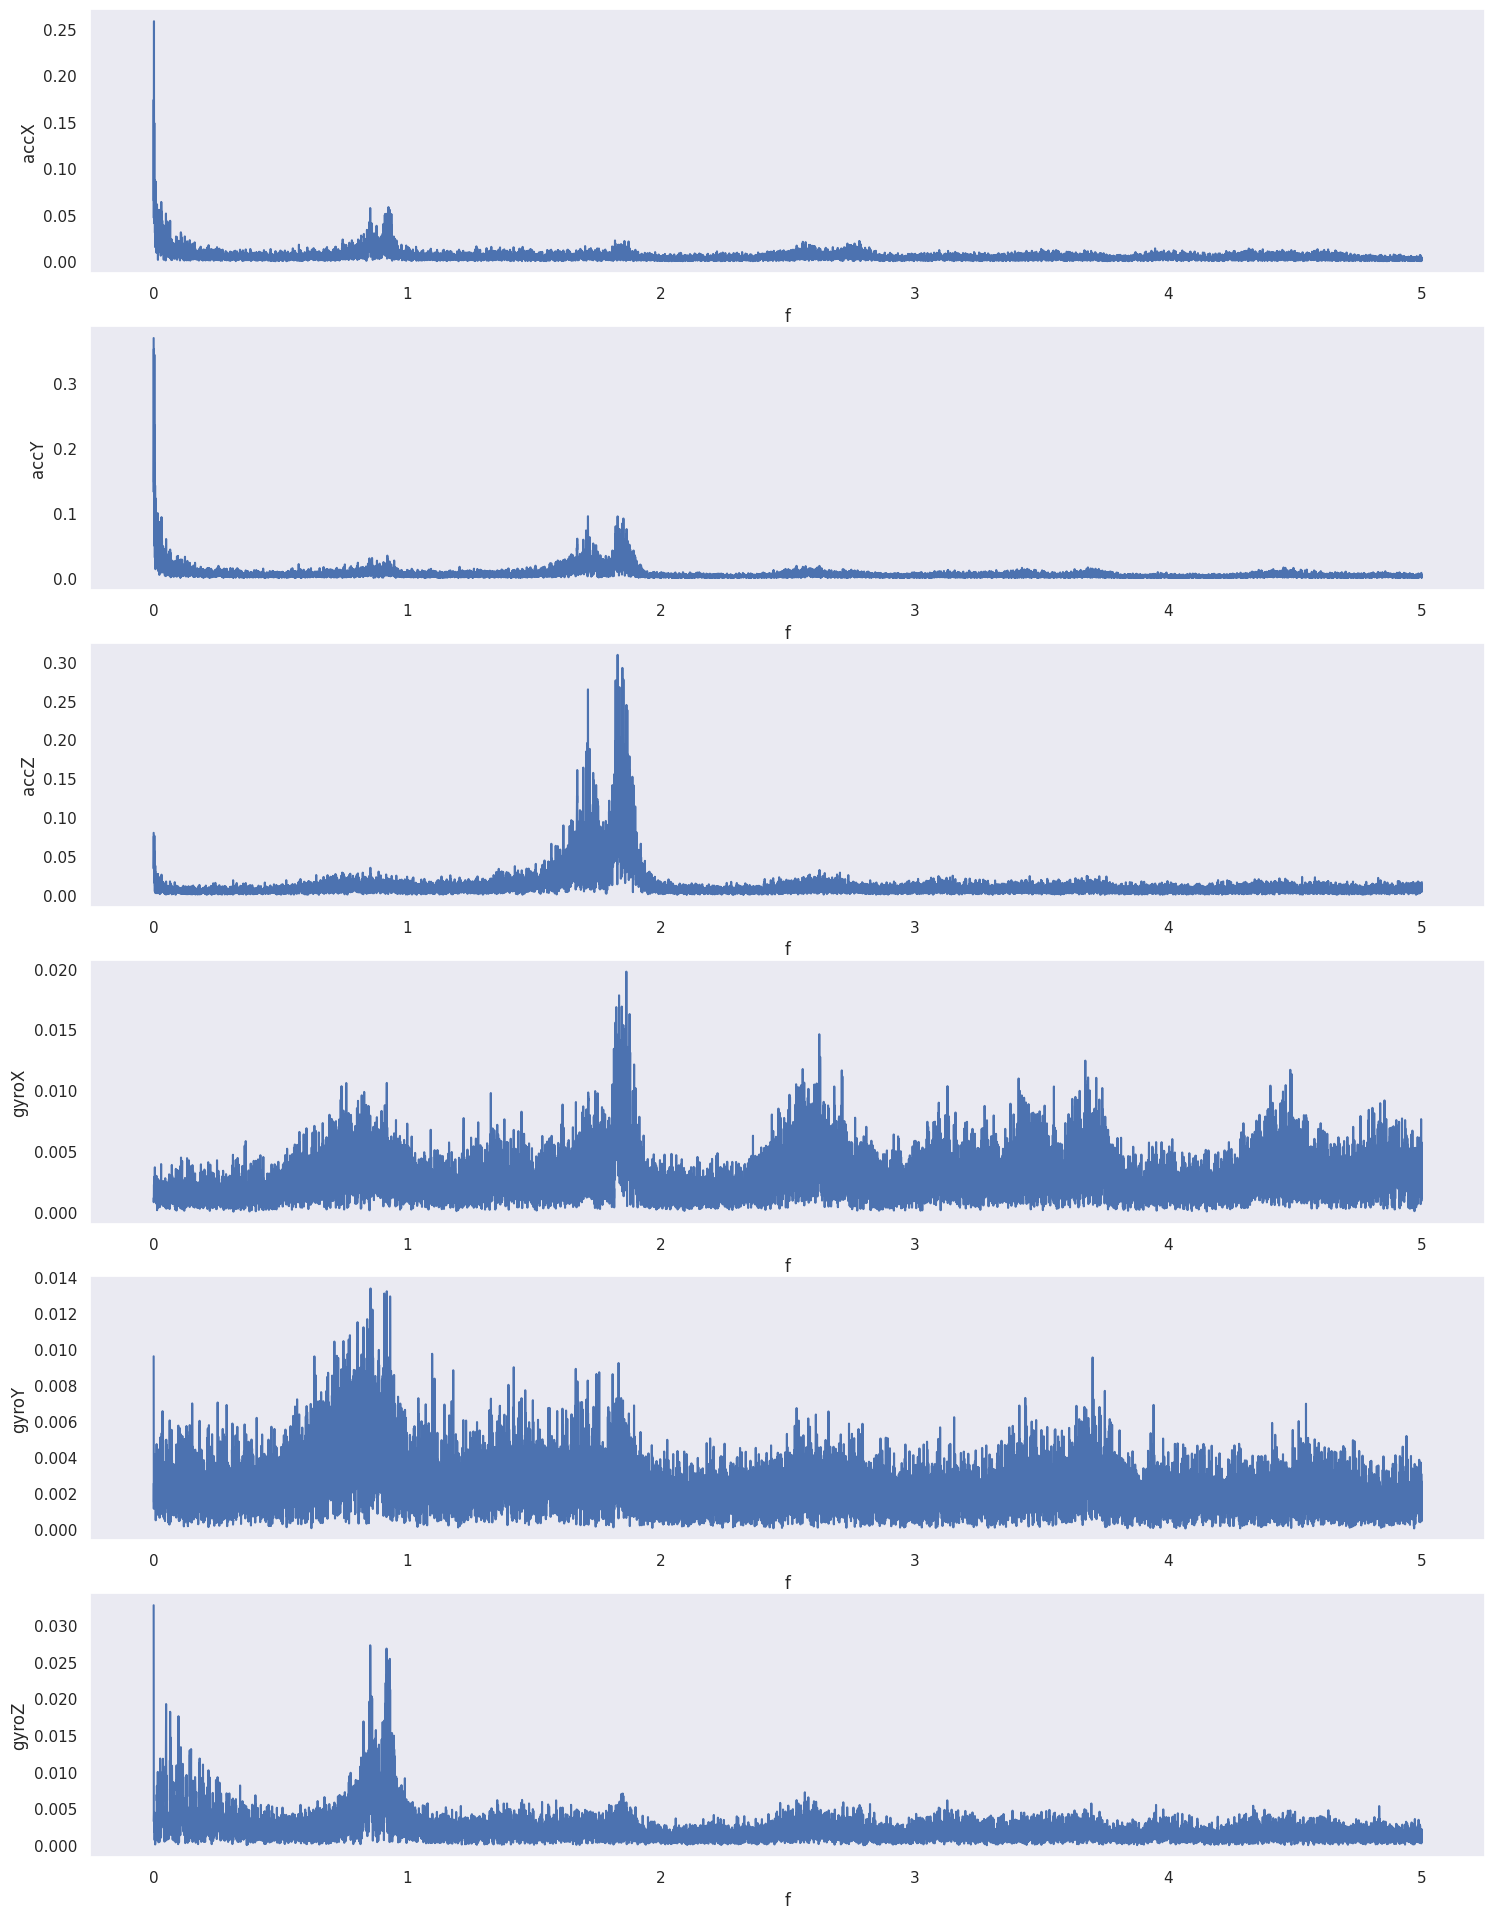

In [ ]:
from scipy.fft import fft, fftfreq, fftshift

T = dataset.timestamp[1] - dataset.timestamp[0]
x = dataset.timestamp.values
N = dataset.shape[0]

plt.figure(figsize=(18,4*n_features))


for i, col in zip(range(n_features), dataset.columns[:-2]):
  y = dataset[col].values
  yf = fft(y)
  xf = fftfreq(N, T)[1:N//2]

  plt.subplot(n_features, 1, i+1)
  plt.plot(xf, 2.0/N * np.abs(yf[1:N//2]))
  plt.grid()


  plt.xlabel('f')
  plt.ylabel(col)
plt.show()

Нулевая гармоника является суммой значений сигнала.  
Как видем, нам это особо ничего не говорит.

Посмотрим на Вейвлет

<ipython-input-35-807d608e95aa>:14: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwtm = signal.cwt(y, signal.morlet2, widths, w=w)


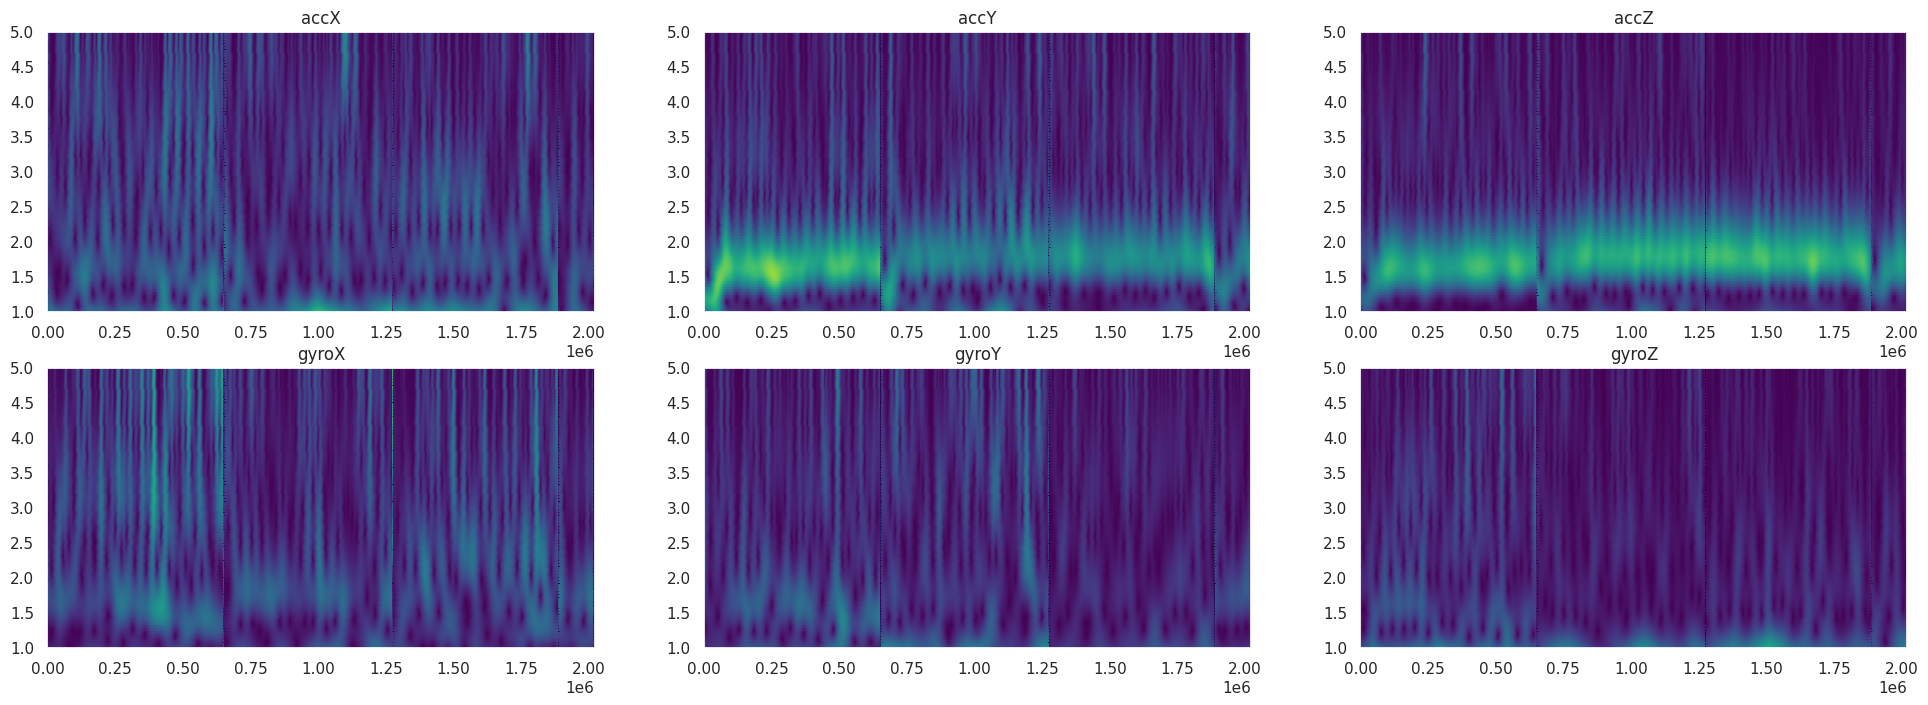

In [ ]:
from scipy import signal

fs = 1/T
w = 5.
freq = np.linspace(1, fs/2, 100)
widths = w*fs / (2*freq*np.pi)

plt.figure(figsize=(8*3,4*2))

for i, col in zip(range(n_features), dataset.columns[:-2]):
    plt.subplot(2, 3, i+1)
    plt.title(col)
    y = dataset[col].values
    cwtm = signal.cwt(y, signal.morlet2, widths, w=w)
    plt.pcolormesh(x, freq, np.abs(cwtm), cmap='viridis', shading='gouraud')
plt.show()

Чем светлей, тем выше амплитуда сигнала

## Алгоритм скользящего ДПФ

Период измерений отвечает за границы спектра (0.1 сек, это 10)

[Статья с SDFT](https://www.music.mcgill.ca/~ich/research/misc/papers/cr1137.pdf)

In [ ]:
from scipy.fft import fft

def SDFT(f, n_window, freq):
  """
  f - массив с измерениями
  n_window - длина окна, ввиде количества семплов
  freq - набор частот

  результат: двумерный массив
  """

  T = 0.1 # период измерений
  max_freq = 1 / (2*T) # максимальная частота, из свойств ДПФ
  dfreq = 2 * max_freq / n_window # растояние между частотами, разрешимость
  N = len(f)

  F = []

  s = len(freq)
  F0 = np.zeros(s, dtype=complex)

  # Начальное распределение
  y = fft(f[:n_window])
  for i, v in zip(range(s), freq):
      n_v = int(v / dfreq)
      F0[i] = y[n_v]
  F.append(2/n_window*np.abs(F0))

  i_t = n_window + 1
  while(i_t < N):
    for i, v in zip(range(s), freq):
      n_v = v / dfreq
      F0[i] = np.exp(2.0*np.pi*1.j*n_v/n_window)*F0[i] - f[i_t-n_window] + f[i_t]
    F.append(2/n_window*np.abs(F0))
    i_t +=1
  return np.array(F)

### Проверка алгоритма

In [ ]:
freq = range(0, 5)
df_accX = pd.DataFrame(data=SDFT(dataset.accX.values, 20, freq), columns=freq)
df_accX

,0,1,2,3,4
0,1.178783,0.297661,0.196515,0.098078,0.118920
1,1.226010,0.299298,0.228131,0.069181,0.143205
2,1.236279,0.294380,0.223918,0.079409,0.142954
3,1.207599,0.320353,0.252501,0.090394,0.161720
4,1.214050,0.314045,0.251068,0.086318,0.168092
...,...,...,...,...,...
31966,1.002525,0.333009,0.313344,0.093341,0.166948
31967,0.944985,0.355274,0.305746,0.123376,0.195860
31968,0.870395,0.351565,0.234822,0.064878,0.125989
31969,0.828258,0.330652,0.211072,0.051365,0.167624


In [ ]:
N = 30
T = 0.1
x = np.linspace(0.0, N*T, N, endpoint=False)
freq_1 = np.array(10*[1]+10*[2]+10*[4])
freq_2 = np.array(10*[3]+10*[4]+10*[1])
y = 5 * np.sin(freq_1 * 2.0*np.pi*x) + 2 * np.sin(freq_2 * 2.0*np.pi*x)

freq = range(0, 5)
SDFT(y, 10, freq)

array([[8.88178420e-16, 5.00000000e+00, 4.61080044e-16, 2.00000000e+00,
        7.37988958e-16],
       [2.17962758e-01, 5.13114614e+00, 2.17962758e-01, 2.20832230e+00,
        2.17962758e-01],
       [2.90617011e-01, 4.64446678e+00, 4.87494803e-01, 2.52974178e+00,
        6.96794488e-01],
       [1.21392207e+00, 3.77860042e+00, 1.30613144e+00, 3.07543758e+00,
        6.73684434e-01],
       [3.36830055e+00, 3.23139830e+00, 2.56195977e+00, 1.46353509e+00,
        1.50453908e+00],
       [3.36830055e+00, 3.23139830e+00, 2.56195977e+00, 1.46353509e+00,
        1.50453908e+00],
       [1.21392207e+00, 1.27070932e+00, 4.71119265e+00, 1.12364298e+00,
        2.34927612e+00],
       [2.90617011e-01, 3.56089502e-01, 5.11410393e+00, 6.12103839e-01,
        1.42769358e+00],
       [2.17962758e-01, 2.17962758e-01, 4.79317836e+00, 2.17962758e-01,
        1.88017196e+00],
       [2.66453526e-15, 3.55715180e-15, 5.00000000e+00, 1.98804336e-15,
        2.00000000e+00],
       [3.93816793e-15, 2.9308

Видно, что алгоритму нужно количество измерений равный количеству сэмплов в окне для того, чтобы он мог сойтись к конкретной частоте.  
Размер окна определяет дискретизацию частот.

### Получения нового набора данных

In [ ]:
def compute_SDFT_data(dataset, columns, n_window, freq):
  df = pd.DataFrame()
  for col in columns:
    data = SDFT(dataset[col].values, n_window, freq)
    for i, v in zip(range(len(freq)), freq):
      df[f'{col}_{v}Hz'] = data[:, i]
  return df

In [ ]:
freq = range(1, 5)
df = compute_SDFT_data(dataset, ['accX', 'accY', 'accZ', 'gyroX', 'gyroY', 'gyroZ'], 10, freq)

n = dataset.index[-1] - df.index[-1]
df['timestamp'] = dataset.timestamp[n:].values
df['Activity'] = dataset.Activity[n:].values

In [ ]:
df.describe()

,accX_1Hz,accX_2Hz,accX_3Hz,accX_4Hz,accY_1Hz,accY_2Hz,accY_3Hz,accY_4Hz,accZ_1Hz,accZ_2Hz,...,gyroY_1Hz,gyroY_2Hz,gyroY_3Hz,gyroY_4Hz,gyroZ_1Hz,gyroZ_2Hz,gyroZ_3Hz,gyroZ_4Hz,timestamp,Activity
count,31981.000000,31981.000000,31981.000000,31981.000000,31981.000000,31981.000000,31981.000000,31981.000000,31981.000000,31981.000000,...,31981.000000,31981.000000,31981.000000,31981.000000,31981.000000,31981.000000,31981.000000,31981.000000,3.198100e+04,31981.000000
mean,0.509995,0.288517,0.292667,0.259220,0.482707,0.813533,0.365335,0.330746,0.867892,2.429390,...,0.186337,0.130761,0.116756,0.115725,0.233341,0.110141,0.109495,0.097481,9.876581e+05,0.982146
std,0.233952,0.159497,0.152159,0.146100,0.267224,0.280001,0.188976,0.165704,0.439378,0.711560,...,0.105199,0.077851,0.065821,0.068248,0.114577,0.063902,0.061898,0.057240,6.136091e+05,0.132424
min,0.005078,0.002738,0.001168,0.000837,0.003743,0.012409,0.001515,0.001512,0.005616,0.011215,...,0.000204,0.000265,0.000464,0.000848,0.002115,0.000877,0.000638,0.001090,1.000000e+00,0.000000
25%,0.342548,0.166491,0.175210,0.148460,0.282219,0.625961,0.226967,0.211053,0.536185,2.161515,...,0.107347,0.072467,0.068086,0.065259,0.152715,0.062239,0.062178,0.053835,6.540913e+05,1.000000
50%,0.493846,0.268874,0.277356,0.237779,0.441480,0.824781,0.341354,0.311912,0.844257,2.558356,...,0.172581,0.118674,0.107944,0.106245,0.225785,0.100322,0.100813,0.087691,6.557344e+05,1.000000
75%,0.662087,0.386386,0.392015,0.345085,0.635786,1.008357,0.478770,0.431504,1.163640,2.873978,...,0.252554,0.176840,0.156776,0.155350,0.301876,0.146542,0.146041,0.130453,1.279527e+06,1.000000
max,1.531805,1.443131,0.997011,1.218363,1.889160,2.049416,1.460618,1.535139,2.810153,4.735560,...,0.690221,0.610187,0.544598,0.559635,0.844287,0.583397,0.466195,0.396153,2.021333e+06,1.000000


In [ ]:
# df.to_csv('/content/drive/My Drive/Colab Notebooks/data/freq_data_n_window_10.csv', index=False)

In [ ]:
df = pd.read_csv(url + 'data/freq_data_n_window_10.csv')
# df = df.drop(['Unnamed: 0'], axis=1)

# Анализ полученных данных

### Матрица корреляции

Text(0.5, 1.0, 'pearson correlation')

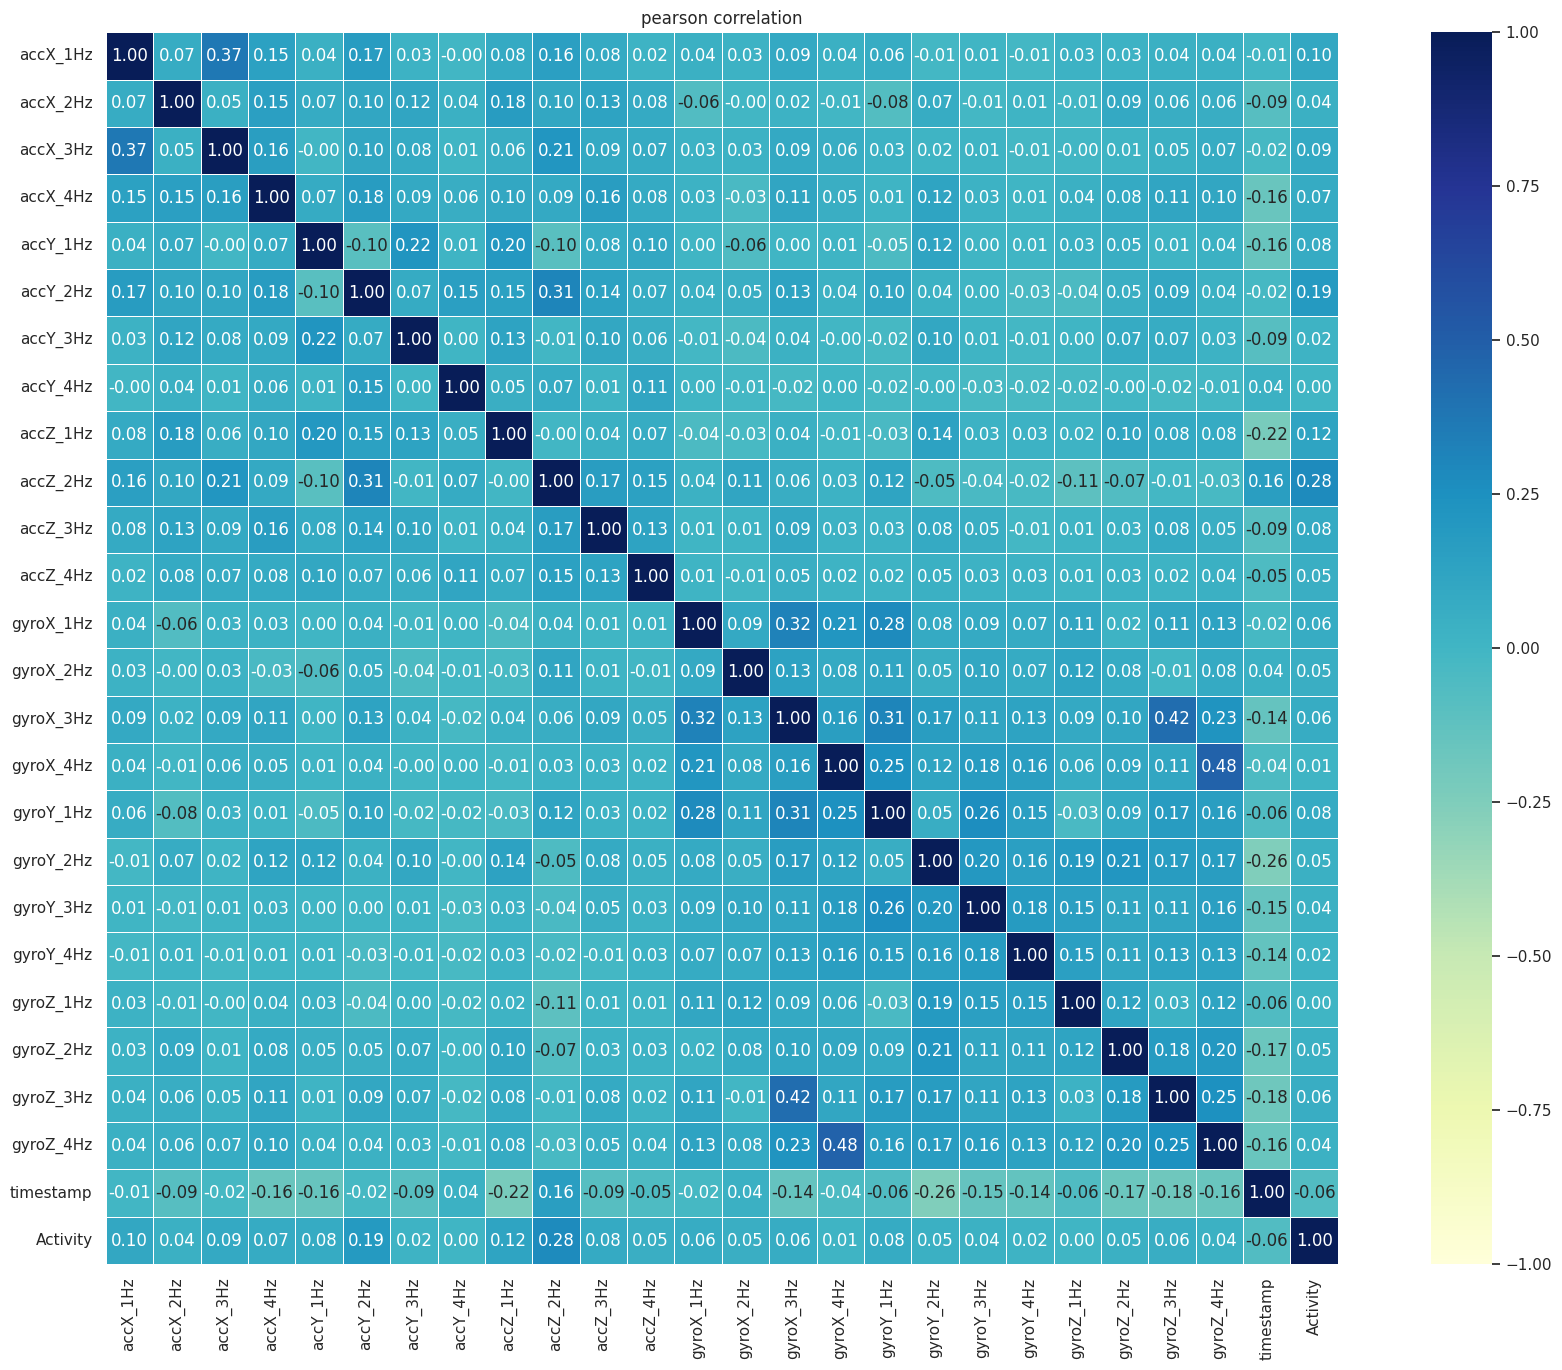

In [ ]:
plt.figure(figsize=(24,16),dpi=100)

corr_matrix = df.corr(method="pearson",numeric_only = True)
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, square=True)
plt.title("pearson correlation")

## Определение важности признаков с помощью cлучайного леса

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(['timestamp', 'Activity'], axis=1)
y = df.Activity

feature_names = X.columns.tolist() # имена столбцов в data.
## Importance
model = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)
model.fit(X, y)
importances = model.feature_importances_ # это оценка, присваиваемая функциям модели машинного обучения,которая определяет, насколько «важной» является функция для прогноза модели.
## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances,
                                "VARIABLE":feature_names}).sort_values("IMPORTANCE",
                                                                       ascending=False)
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")

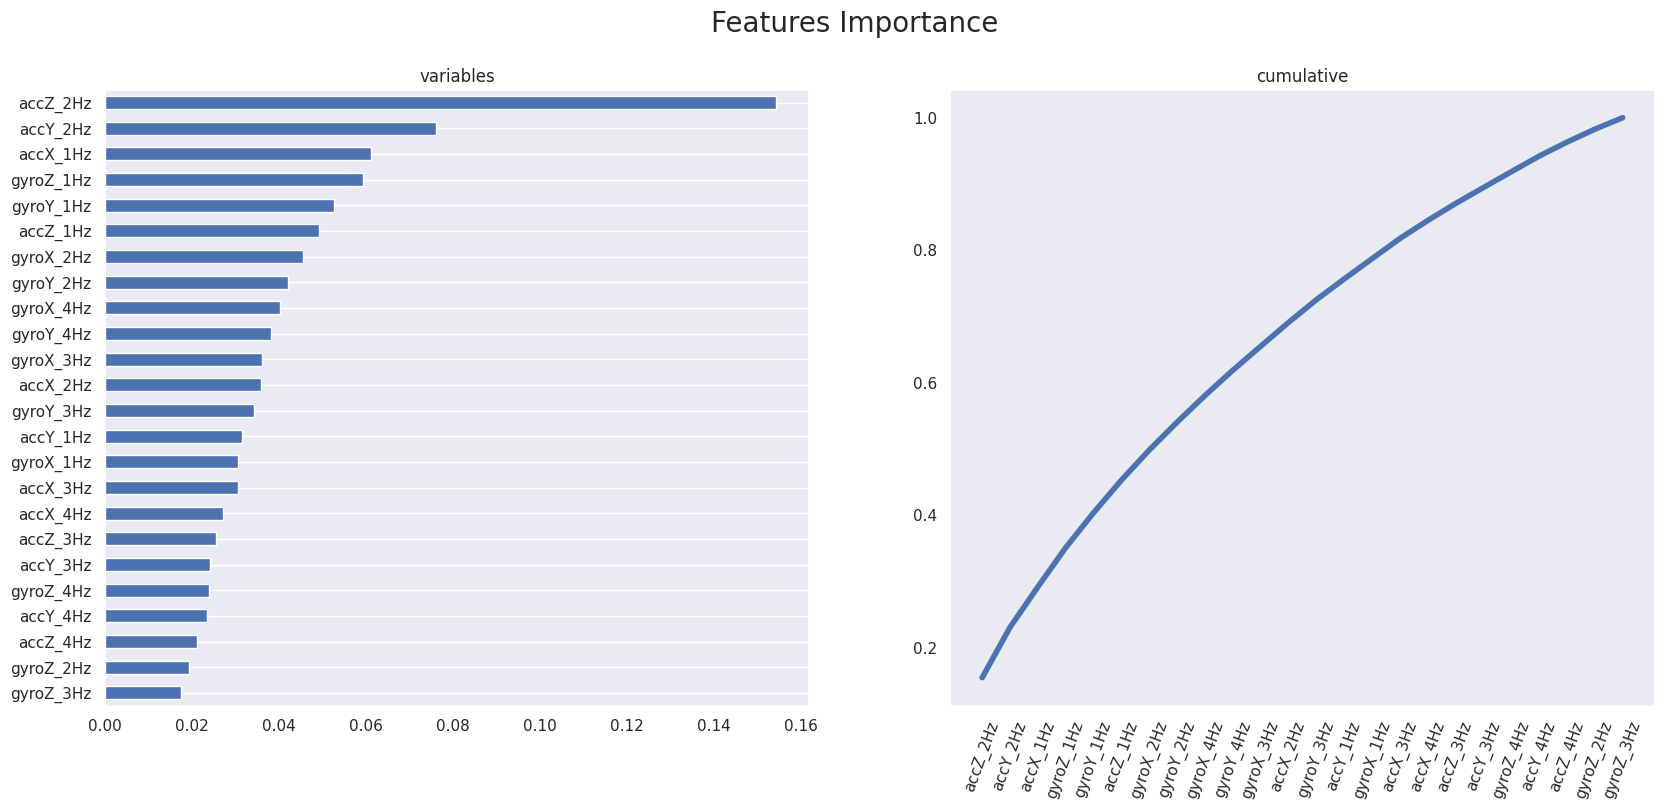

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False,figsize=(20,8),dpi=100)# распаковываем  кортеж в переменные figи ax.
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables') # подпишем график
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
    kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative') # подпишем график
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4,
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)),
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both') # Настроим линии сетки.
plt.show()

In [ ]:
dtf_importances

,IMPORTANCE,cumsum
VARIABLE,,
accZ_2Hz,0.154092,0.154092
accY_2Hz,0.076091,0.230184
accX_1Hz,0.061070,0.291254
gyroZ_1Hz,0.059304,0.350558
gyroY_1Hz,0.052680,0.403237
accZ_1Hz,0.049202,0.452439
gyroX_2Hz,0.045489,0.497928
gyroY_2Hz,0.042159,0.540087
gyroX_4Hz,0.040208,0.580295


In [ ]:
importances = dtf_importances.loc[dtf_importances['IMPORTANCE'] > 0.038].index.values
importances

array(['accZ_2Hz', 'accY_2Hz', 'accX_1Hz', 'gyroZ_1Hz', 'gyroY_1Hz',
       'accZ_1Hz', 'gyroX_2Hz', 'gyroY_2Hz', 'gyroX_4Hz', 'gyroY_4Hz'],
      dtype=object)

# Предобработка данных для построения модели

In [ ]:
from sklearn import model_selection, preprocessing, feature_selection, linear_model, metrics, decomposition

# Мы не можем наши данные перемасштабировать, так как в реальности прогнозировать нужно

X = df[importances]
y = df.Activity

## Балансировка данных, SMOTE метод (Over-Sampling)

<Axes: title={'center': 'Распределение классов \n (0: неподвижен || 1: двигается)'}, xlabel='Activity', ylabel='count'>

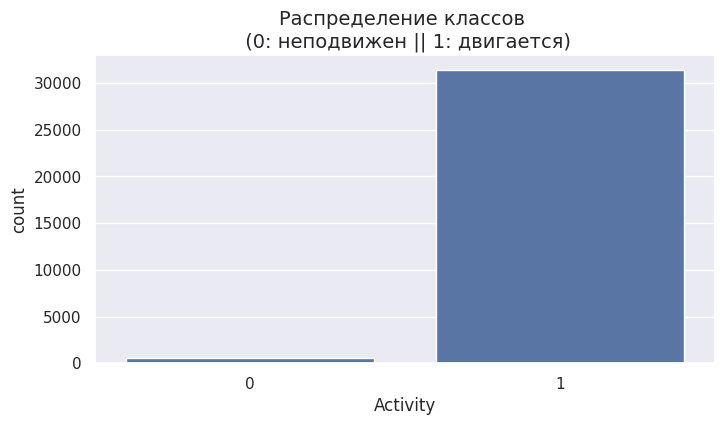

In [ ]:
plt.figure(figsize=(8, 4))

plt.title('Распределение классов \n (0: неподвижен || 1: двигается)', fontsize=14)
sns.countplot(x=df['Activity'])

<b>SMOTE</b> означает $Synthetic$ $Minority$ $Over-sampling$ $Technique$.  
Он создает новые синтетические точки для того, чтобы создать баланс классов.  
Это еще одна альтернатива для решения проблемы дисбаланса классов. <br><br>


<b> Принцип работы SMOTE: </b>
<ul>
<li><b>Генерация синтетических точек: </b> SMOTE выбирает расстояние между ближайшими соседями меньшего класса и между ними создает синтетические точки. </li>
<li> <b>Преимущество:  </b> Сохраняется больше информации, поскольку нам не пришлось удалять данные, в отличие от under-sampling.</li>
</ul>

<b>Правильное использование SMOTE:</b>  
Если мы создадим синтетические точки перед кросс-валидацией, мы окажем определенное влияние на тестовое выборку.  
Но тестовая выборка не должна быть тронута!  
По этой причине мы должны создавать синтетические точки данных во время кросс-валидации, а не до нее.

Попробуем в качестве алгоритм подбора гиперпараметров случайный поиск.  
Он работает быстрее, чем поиск по сетке.

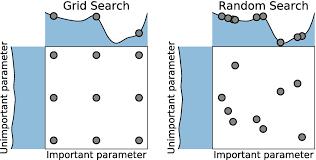

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

<Axes: title={'center': 'Распределение классов \n (0: неподвижен || 1: двигается)'}, xlabel='Activity', ylabel='count'>

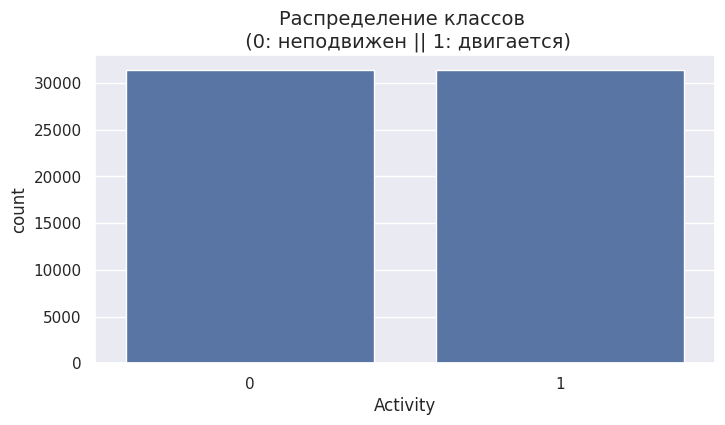

In [ ]:
plt.figure(figsize=(8, 4))

plt.title('Распределение классов \n (0: неподвижен || 1: двигается)', fontsize=14)
sns.countplot(x=y)

# Построение модели

## Train Test разделение

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 30)

## Обучение и выбор оптимальной модели

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNC', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVC', SVC()))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.884227 (0.005155)
LDA: 0.870651 (0.006357)
KNC: 0.980079 (0.002922)
DTC: 0.980102 (0.002372)
SVC: 0.934256 (0.005096)


Видем, что KNC и DTC имеют примерно одну точность.  
K-Neighbors Классификатор более простой в реализации.

## Обучение конкретной модели

### Классификатор К-ближайших соседий

In [ ]:
model = KNeighborsClassifier()

param_dic = {'n_neighbors':[2, 3, 5],
             'weights':['uniform', 'distance'],
             'algorithm':['ball_tree', 'kd_tree', 'brute'],
             'leaf_size':[15, 20, 24]}

## random search(Рандомизированный поиск по гиперпараметрам.)
random_search = model_selection.RandomizedSearchCV(model,
                                                   param_distributions=param_dic, n_iter=10,
                                                   scoring="accuracy").fit(X_train, y_train)
print("Best Model parameters:", random_search.best_params_)
print("Best Model mean accuracy:", random_search.best_score_)
model = random_search.best_estimator_   # здесь теперь хранятся параметры, при которых были получены наилучшие метрики на трейне

Best Model parameters: {'weights': 'distance', 'n_neighbors': 2, 'leaf_size': 15, 'algorithm': 'kd_tree'}
Best Model mean accuracy: 0.9900850352383783


## Оценка классификатора

In [ ]:
predicted = model.predict(X_test)

## Accuray e AUC
'''
Теперь смотрим метрики.
НА ТЕСТОВОМ ДАТАСЕТЕ
'''
accuracy = metrics.accuracy_score(y_test, predicted)#Оценим точность классификации.

'''
Получим результат
'''

## Precision e Recall
recall = metrics.recall_score(y_test, predicted, average="weighted")
precision = metrics.precision_score(y_test, predicted, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Recall (all 1s predicted right): 0.99
Precision (confidence when predicting a 1): 0.99
Detail:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9464
           1       1.00      0.98      0.99      9382

    accuracy                           0.99     18846
   macro avg       0.99      0.99      0.99     18846
weighted avg       0.99      0.99      0.99     18846



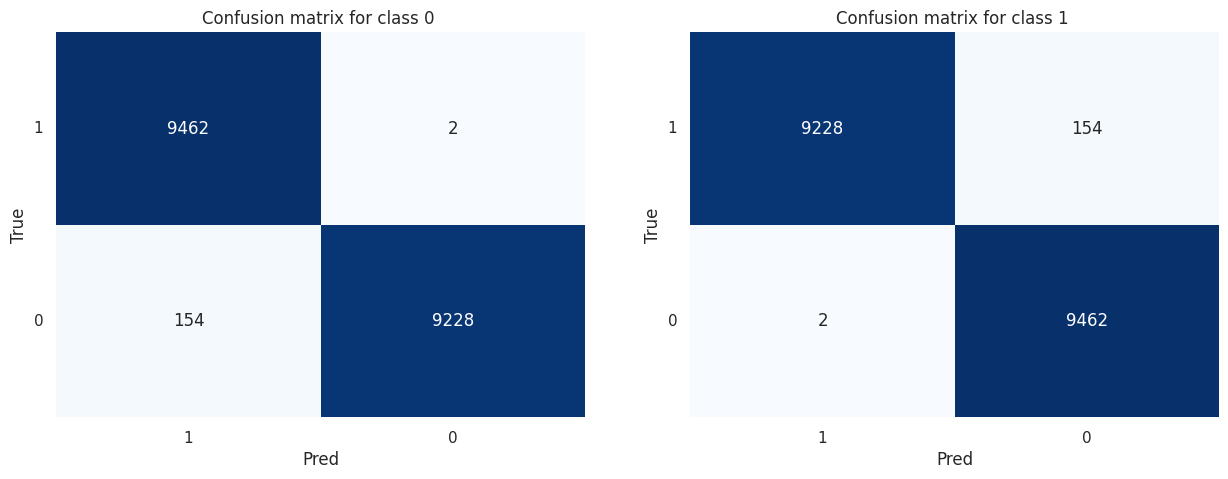

In [ ]:
def compute_class(ls_res, class_value): # возвращаем строку имен классов
    y_t_class = ls_res.copy().astype(int)
    y_t_class = y_t_class.apply(lambda c: 1 if c  == class_value  else 0)
    return  y_t_class

classes = np.unique(y_test).astype(int)
lbs = [1,0]

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,5),dpi=100)

for class_i in classes:
    y_one_class = compute_class(y_test,class_i)
    predicted_one_class = compute_class(pd.Series(predicted.tolist()),class_i)#возвращает строку имен классов
    cm = metrics.confusion_matrix(y_one_class, predicted_one_class, labels=lbs)
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False, ax=ax[class_i])
    ax[class_i].set(xlabel="Pred", ylabel="True", title=f"Confusion matrix for class {class_i} ")
    ax[class_i].set_xticklabels(labels=lbs, rotation=0)
    ax[class_i].set_yticklabels(labels=lbs, rotation=0)

plt.show()

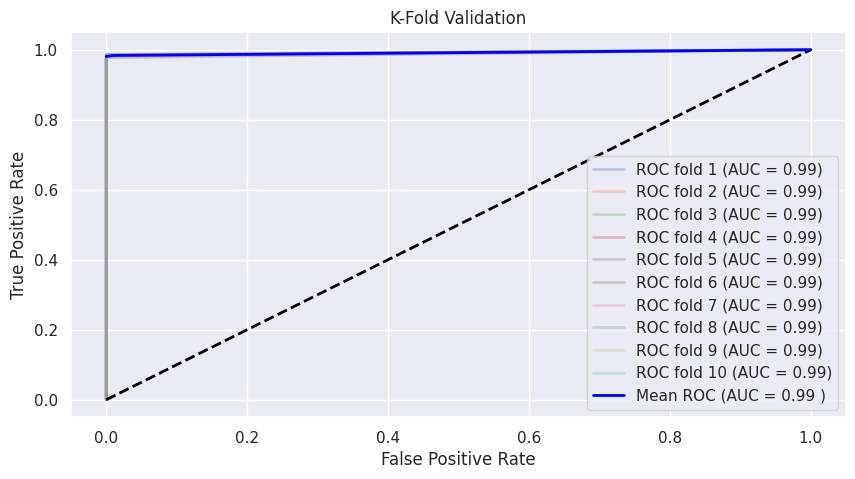

In [ ]:
'''
Строим ROC кривые
'''
cv = model_selection.StratifiedKFold(n_splits=10, shuffle=True)
tprs, aucs = [], []
mean_fpr = np.linspace(0,1,100)
fig = plt.figure(figsize=(10,5),dpi=100)
i = 1
for train, test in cv.split(X_train, y_train):
    '''
iloc - позволяет получить определенное значение, принадлежащее к строке и столбцу,
используя указанные значения индекса
X_train - это весь экземпляр с атрибутами,
y_train - это метка каждого экземпляра.
train_selected_test - Разделяет массивы / матрицы на случайные тестовые подмножества.

'''
    X_train_selected = X_train.iloc[train]

    y_train_selected = y_train.iloc[train]
    X_train_selected_test = X_train.iloc[test]
    y_train_selected_test = y_train.iloc[test]

    prediction = model.fit(X_train_selected, y_train_selected).predict_proba(X_train_selected_test)
    fpr, tpr, t = metrics.roc_curve(y_train_selected_test, prediction[:, 1], pos_label=1)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i+1
'''
Получим результат
'''
plt.plot([0,1], [0,1], linestyle='--', lw=2, color='black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
'''
построим график

'''
plt.plot(mean_fpr, mean_tpr, color='blue', label=r'Mean ROC (AUC = %0.2f )' % (mean_auc), lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Fold Validation')
plt.legend(loc="lower right")

plt.show()

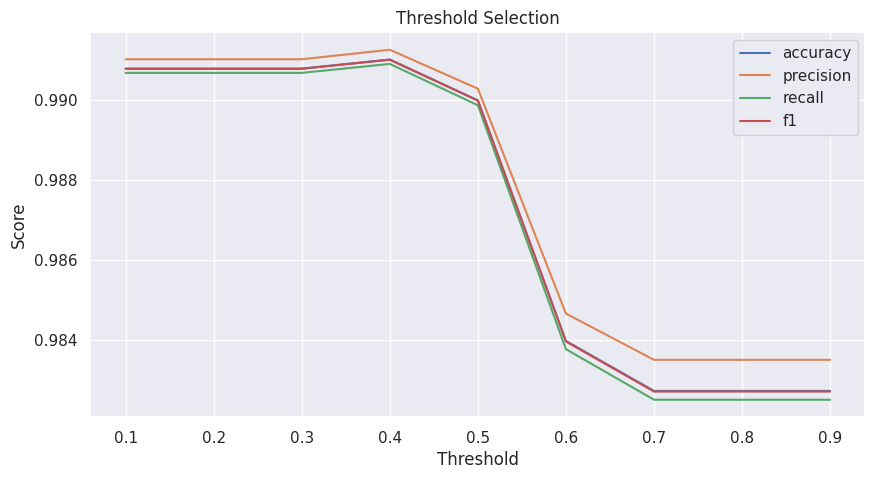

In [ ]:
## calculate scores for different thresholds
'''
Определим, какие значения отсечки лучше всего для нашей модели.
Для этого построим график ("значение отсечки", "значение метрики") для каждой метрики accuracy, precision, recall, f1
'''
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,5),dpi=100)

dic_scores = {'accuracy':[], 'precision':[], 'recall':[], 'f1':[]}
XX_train, XX_test, yy_train, yy_test = model_selection.train_test_split(X_train, y_train, test_size=0.2)
predicted_prob = model.fit(XX_train, yy_train).predict_proba(XX_test)[:,1]
thresholds = []
for threshold in np.arange(0.1, 1, step=0.1):
    predicted = (predicted_prob > threshold)
    thresholds.append(threshold)
    dic_scores["accuracy"].append(metrics.accuracy_score(yy_test, predicted))
    dic_scores["precision"].append(metrics.precision_score(yy_test, predicted, average='macro', zero_division=1))
    dic_scores["recall"].append(metrics.recall_score(yy_test, predicted, average='macro'))
    dic_scores["f1"].append(metrics.f1_score(yy_test, predicted, average='macro'))
'''
Добавим линии
'''
## plot
dtf_scores = pd.DataFrame(dic_scores).set_index(pd.Index(thresholds))
ax.set(xlabel='Threshold', ylabel="Score", title="Threshold Selection")
dtf_scores.plot(ax=ax)
'''
отрисовываем
'''

plt.show()

# Вывод  

Наилучшей моделью оказался классификатор K-ближайших соседей.

Алгоритм K-ближайших соседей (KNN) работает по принципу подобия, где он предсказывает метку или значение новой точки данных, учитывая метки или значения ее K ближайших соседей в обучающем наборе данных.  

Временная сложность: O(N * logN)  
Вспомогательное пространство: O(1)

Сложность реализации алгоритмов SDFT и KNN невысокая, при этом задействующая память и время расчета относительно частоты поступления измерений маленькая.  
После остановки, алгоритм её сможет обнаружить через $T*n_{window} = 1 сек$ .  
